# MAT 381E Homework 2

## Question 1

For this question we are going to use [an NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). 

1. Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.
2. Write a function that takes the `GAME_ID` as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.
3. Write a function that takes the `GAME_ID` as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in `PLAYER1_NAME`,`PLAYER2_NAME`, or `PLAYER3_NAME` columns.
4. Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.
5. Write a function that takes the `GAME_ID` as the parameter and returns a list of pairs of player names where the pair interacted during the game more than once. Test your function on 5 random matches.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import seaborn as sns

from urllib.request import Request, urlopen
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from io import BytesIO
from xmltodict import parse

1.1

In [ ]:
df = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
data = pd.DataFrame(df)
data

1.2

In [41]:
def gameData(GameID) :
    game_data = data[data['GAME_ID']== GameID]
    return game_data

gameData(21800794)


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,444,1,9,636,21800794,SUNS Timeout: Regular (Full 7 Short 0),NaN,0:21,4,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:18 PM
445,445,0,8,637,21800794,SUB: Crawford FOR Holmes,NaN,0:21,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:18 PM
446,446,1,2,639,21800794,MISS Bridges 3PT Jump Shot,NaN,0:17,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:20 PM
447,447,0,4,640,21800794,NaN,NaN,0:14,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faried REBOUND (Off:7 Def:7),11:20 PM


In [90]:
gameData(21800800)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
19922,0,0,12,2,21800800,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
19923,1,0,10,4,21800800,Jump Ball Embiid vs. Ibaka: Tip to Muscala,NaN,12:00,1,4.0,...,203488,Mike Muscala,PHI,Philadelphia,1.610613e+09,76ers,NaN,NaN,NaN,8:17 PM
19924,2,1,2,7,21800800,MISS Butler 20' Jump Shot,NaN,11:44,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
19925,3,0,4,8,21800800,Embiid REBOUND (Off:1 Def:0),NaN,11:42,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
19926,4,72,1,9,21800800,Embiid 1' Putback Layup (2 PTS),NaN,11:41,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 2,2,NaN,8:17 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20390,468,78,1,679,21800800,Butler 13' Floating Jump Shot (18 PTS) (Simmon...,NaN,0:46,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,117 - 107,-10,NaN,10:41 PM
20391,469,5,1,681,21800800,NaN,NaN,0:24,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,119 - 107,-12,Siakam 1' Layup (16 PTS) (Ibaka 3 AST),10:41 PM
20392,470,1,2,683,21800800,MISS Embiid 26' 3PT Jump Shot,NaN,0:14,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:41 PM
20393,471,0,4,684,21800800,NaN,NaN,0:11,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ibaka REBOUND (Off:3 Def:7),10:41 PM


In [92]:
gameData(21800796)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
104203,0,0,12,2,21800796,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:12 PM
104204,1,0,10,4,21800796,Jump Ball Biyombo vs. Gortat: Tip to Williams,NaN,12:00,1,4.0,...,101107,Marvin Williams,CHA,Charlotte,1.610613e+09,Hornets,NaN,NaN,NaN,7:12 PM
104205,2,1,2,7,21800796,MISS Williams 24' 3PT Jump Shot,NaN,11:40,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:13 PM
104206,3,0,4,8,21800796,NaN,NaN,11:37,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beverley REBOUND (Off:0 Def:1),7:13 PM
104207,4,2,6,9,21800796,Walker S.FOUL (P1.T1) (L.Richardson),NaN,11:30,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:13 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104661,458,0,8,657,21800796,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Thornwell FOR Williams,9:23 PM
104662,459,1,9,662,21800796,HORNETS Timeout: Regular (Full 7 Short 0),NaN,0:04,4,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:24 PM
104663,460,1,2,663,21800796,MISS Williams 25' 3PT Jump Shot,NaN,0:00,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:25 PM
104664,461,0,4,664,21800796,HORNETS Rebound,NaN,0:00,4,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:25 PM


1.3

In [43]:
def playerAppears(GameID) :
    game_data = data[data['GAME_ID']== GameID]
    player1 = Counter(game_data['PLAYER1_NAME'])
    player2 = Counter(game_data['PLAYER2_NAME'])
    player3 = Counter(game_data['PLAYER3_NAME'])
    return player1,player2,player3

playerAppears(21800794)


(Counter({nan: 37,
          'Deandre Ayton': 32,
          'Josh Jackson': 36,
          'James Harden': 53,
          'Mikal Bridges': 23,
          'Devin Booker': 33,
          'Elie Okobo': 14,
          'James Ennis III': 21,
          'PJ Tucker': 22,
          'Kenneth Faried': 35,
          'Chris Paul': 32,
          'Carl Herrera': 1,
          'Nene': 8,
          'Austin Rivers': 21,
          'Kelly Oubre Jr.': 25,
          'Gerald Green': 18,
          'Richaun Holmes': 20,
          'Jamal Crawford': 18}),
 Counter({nan: 294,
          'Kenneth Faried': 6,
          'James Harden': 20,
          'Devin Booker': 13,
          'James Ennis III': 11,
          'Deandre Ayton': 9,
          'Elie Okobo': 6,
          'Chris Paul': 18,
          'Josh Jackson': 6,
          'Kelly Oubre Jr.': 13,
          'Austin Rivers': 8,
          'Nene': 3,
          'Gerald Green': 3,
          'Mikal Bridges': 12,
          'Richaun Holmes': 6,
          'Jamal Crawford': 12,
      

1.4

We need to remove 'nan' values : 

<BarContainer object of 17 artists>

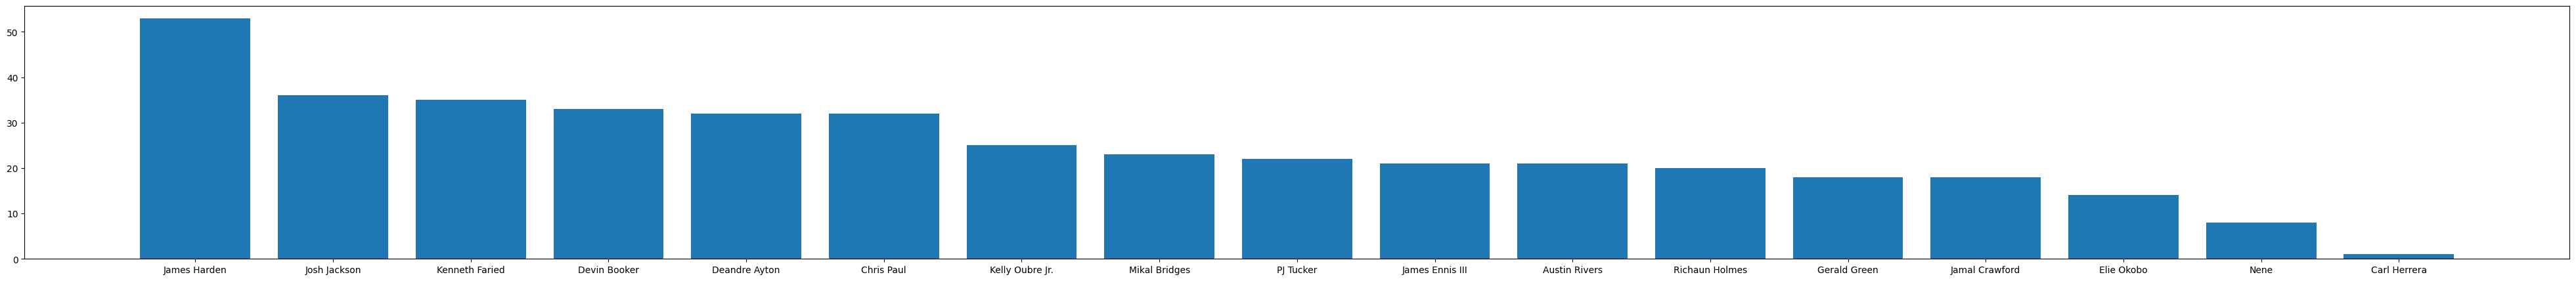

In [89]:
from collections import Counter, OrderedDict

raw = Counter(gameData(21800794)['PLAYER1_NAME'])
del raw[nan]

player_1 = OrderedDict(raw.most_common())

labels = list(player_1.keys())
values = player_1.values()

plt.figure(figsize=(50,5))
plt.bar(labels,values)

<BarContainer object of 16 artists>

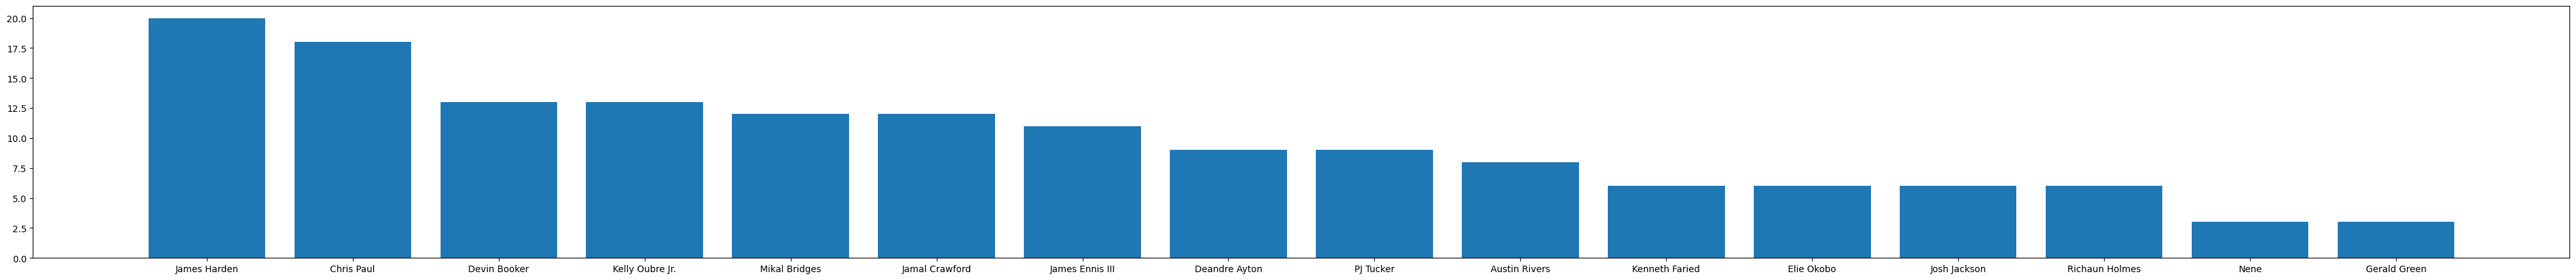

In [93]:
from collections import Counter, OrderedDict

raw = Counter(gameData(21800794)['PLAYER2_NAME'])
del raw[nan]

player_1 = OrderedDict(raw.most_common())

labels = list(player_1.keys())
values = player_1.values()

plt.figure(figsize=(50,5))
plt.bar(labels,values)

<BarContainer object of 4 artists>

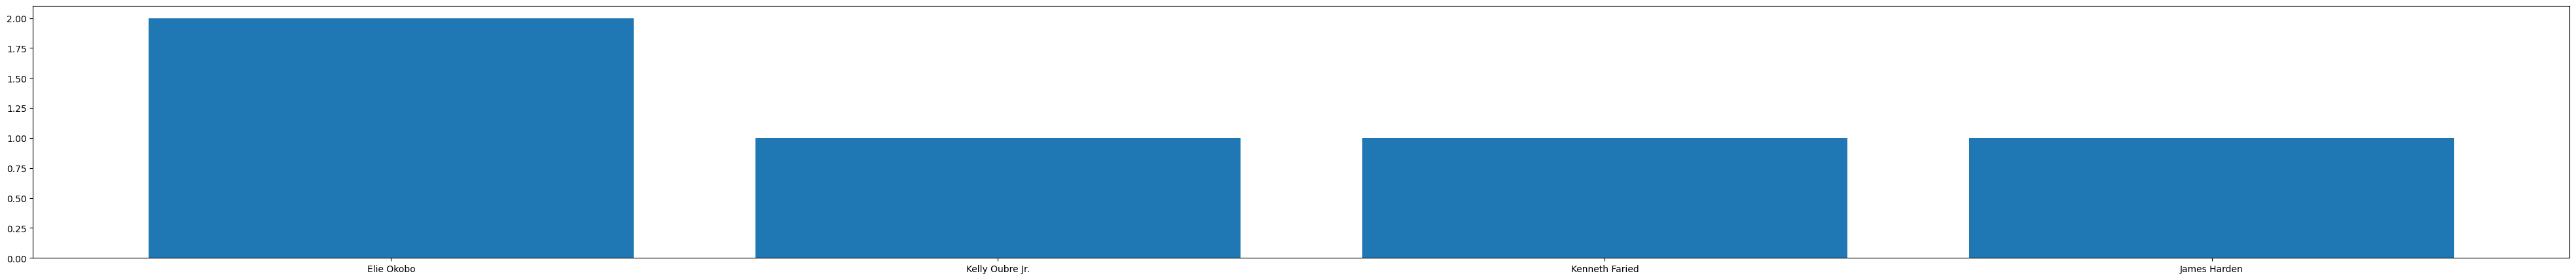

In [94]:
from collections import Counter, OrderedDict

raw = Counter(gameData(21800794)['PLAYER3_NAME'])
del raw[nan]

player_1 = OrderedDict(raw.most_common())

labels = list(player_1.keys())
values = player_1.values()

plt.figure(figsize=(50,5))
plt.bar(labels,values)

## Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

1. Ingest the data as a python dictionary using the [json](https://docs.python.org/3/library/json.html) library.
2. Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function count how many times each artist appears.
3. Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.
4. Plot the result you obtain from Step 3 as a bar chart.
5. Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

Question 2.1

In [ ]:
url = 'https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json'
response = urlopen(url)
json_data = json.loads(response.read())
json_data

Question 2.2

In [ ]:
artists = []
for i in json_data['playlists']:
    for j in i['tracks']:
        artists.append(j['artist_name'])
        
artists

Question 2.3

In [ ]:
counter_artist = Counter(artists)
counter_artist

Question 2.3

Sorted and filter(<100) 

In [ ]:
from collections import Counter, OrderedDict
sortedArtist = OrderedDict(counter_artist.most_common())

min_threshold = 100
sortedAndmore100 = {x: count for x, count in sortedArtist.items() if count > min_threshold}
sortedAndmore100


In [ ]:

labels = list(sortedAndmore100.keys())
values = sortedAndmore100.values()

plt.figure(figsize=(100,20))
plt.bar(labels,values)

Question 2.5

In [ ]:
songs = []
for i in json_data['playlists']:
    for j in i['tracks']:
        songs.append(j["track_name"])
        
songsCounter = Counter(songs)
songsCounter

In [ ]:
sortedSongs = OrderedDict(songsCounter.most_common())

min_threshold1 = 25
sortedAndmore25 = {x: count for x, count in sortedSongs.items() if count > min_threshold1}

sortedAndmore25

Plot BarChart

In [ ]:
labels1 = list(sortedAndmore25.keys())
values1 = sortedAndmore25.values()

plt.figure(figsize=(100,20))
plt.bar(labels1,values1)

## Question 3

For this question we are going to use [Wordbank Data](https://data.worldbank.org/). I would suggest [wbgapi](https://pypi.org/project/wbgapi/) library.

1. Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.
2. Get the data for Turkey for the following indicators:
   * [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
   * [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
   * [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
   * [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
   * [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
3. Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.
4. Write a function that takes two indicators `id1` and `id2` and does a scatter plot of `id1` against `id2` after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.

In [2]:
import wbgapi as wb

Quesiton 3.1

In [3]:
def fetchData(indicators,country) :
    df = pd.DataFrame(wb.data.fetch(indicators,country))
    return df
   

Question 3.2

Poverty : 

In [6]:
poverty = fetchData('SI.POV.NAHC','TUR')
poverty

,value,series,economy,aggregate,time
0,NaN,SI.POV.NAHC,TUR,False,YR2021
1,NaN,SI.POV.NAHC,TUR,False,YR2020
2,15.0,SI.POV.NAHC,TUR,False,YR2019
3,14.4,SI.POV.NAHC,TUR,False,YR2018
4,13.9,SI.POV.NAHC,TUR,False,YR2017
...,...,...,...,...,...
57,NaN,SI.POV.NAHC,TUR,False,YR1964
58,NaN,SI.POV.NAHC,TUR,False,YR1963
59,NaN,SI.POV.NAHC,TUR,False,YR1962
60,NaN,SI.POV.NAHC,TUR,False,YR1961


Current Health Expenditure

In [7]:
expenditure = fetchData('SH.XPD.CHEX.PC.CD','TUR')
expenditure

,value,series,economy,aggregate,time
0,NaN,SH.XPD.CHEX.PC.CD,TUR,False,YR2021
1,NaN,SH.XPD.CHEX.PC.CD,TUR,False,YR2020
2,396.466827,SH.XPD.CHEX.PC.CD,TUR,False,YR2019
3,389.865570,SH.XPD.CHEX.PC.CD,TUR,False,YR2018
4,442.617615,SH.XPD.CHEX.PC.CD,TUR,False,YR2017
...,...,...,...,...,...
57,NaN,SH.XPD.CHEX.PC.CD,TUR,False,YR1964
58,NaN,SH.XPD.CHEX.PC.CD,TUR,False,YR1963
59,NaN,SH.XPD.CHEX.PC.CD,TUR,False,YR1962
60,NaN,SH.XPD.CHEX.PC.CD,TUR,False,YR1961


Labor Force

In [8]:
labor = fetchData('SL.TLF.CACT.FE.NE.ZS','TUR')
labor

,value,series,economy,aggregate,time
0,NaN,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR2021
1,30.840000,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR2020
2,34.310001,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR2019
3,34.119999,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR2018
4,33.529999,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR2017
...,...,...,...,...,...
57,NaN,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR1964
58,NaN,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR1963
59,NaN,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR1962
60,NaN,SL.TLF.CACT.FE.NE.ZS,TUR,False,YR1961


Mortality Rate

In [9]:
mortality = fetchData('SH.DYN.MORT','TUR')
mortality

,value,series,economy,aggregate,time
0,NaN,SH.DYN.MORT,TUR,False,YR2021
1,9.5,SH.DYN.MORT,TUR,False,YR2020
2,10.1,SH.DYN.MORT,TUR,False,YR2019
3,10.7,SH.DYN.MORT,TUR,False,YR2018
4,11.4,SH.DYN.MORT,TUR,False,YR2017
...,...,...,...,...,...
57,225.7,SH.DYN.MORT,TUR,False,YR1964
58,233.5,SH.DYN.MORT,TUR,False,YR1963
59,241.4,SH.DYN.MORT,TUR,False,YR1962
60,249.3,SH.DYN.MORT,TUR,False,YR1961


Literacy 

In [10]:
literacy = fetchData('SE.ADT.LITR.FE.ZS','TUR')
literacy

,value,series,economy,aggregate,time
0,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR2021
1,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR2020
2,94.424042,SE.ADT.LITR.FE.ZS,TUR,False,YR2019
3,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR2018
4,93.498268,SE.ADT.LITR.FE.ZS,TUR,False,YR2017
...,...,...,...,...,...
57,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR1964
58,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR1963
59,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR1962
60,NaN,SE.ADT.LITR.FE.ZS,TUR,False,YR1961


In [11]:
def plotGraph(data_name) :

    tmp = data_name[['value','time']]
    tmp.sort_values(by='time', inplace=True)
    tmp.index = tmp['time']
    tmp.dropna(inplace=True)
    tmp
    plt.figure(figsize=(40,3))
    return plt.plot(tmp['time'],tmp['value'])

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values(by='time', inplace=True)
/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


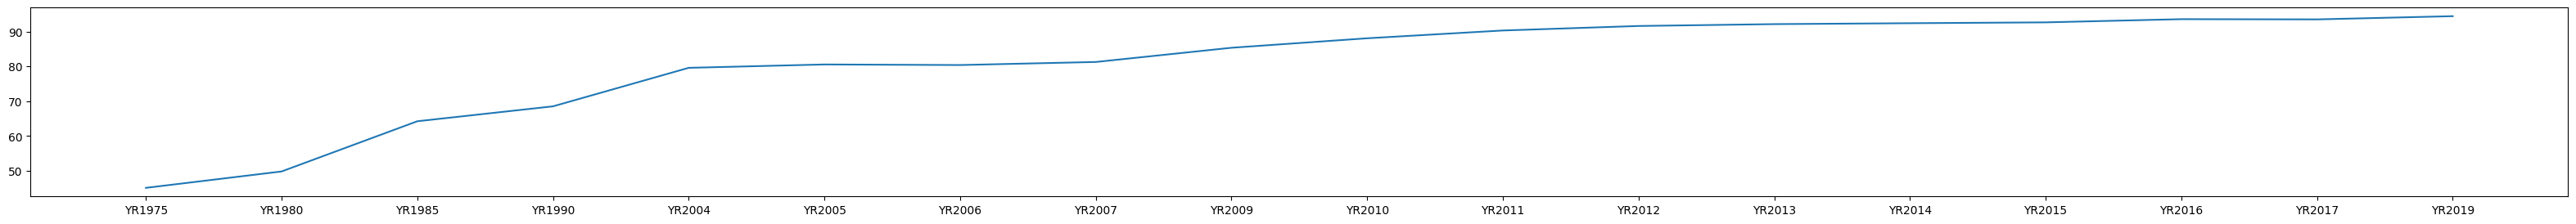

In [108]:
plotGraph(literacy)

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values(by='time', inplace=True)
/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


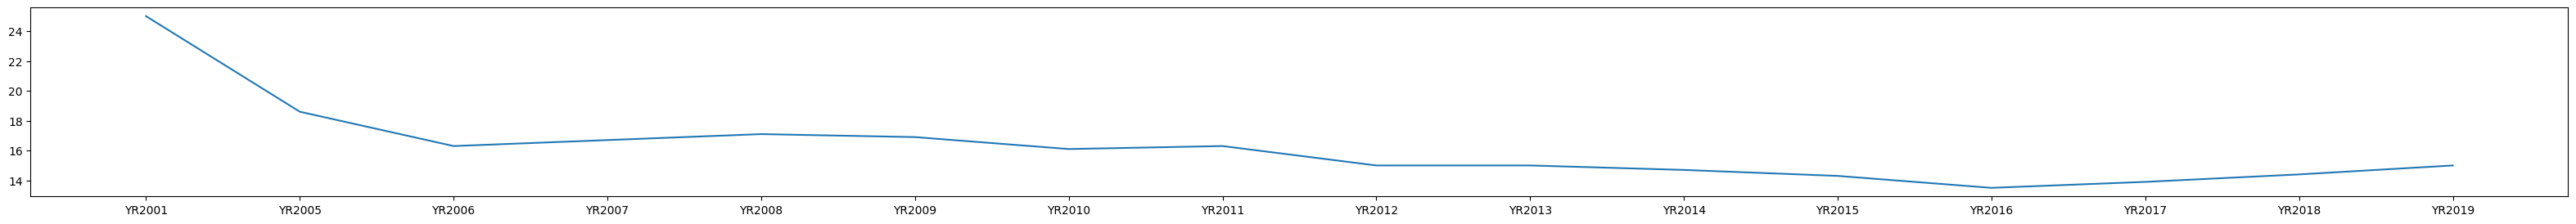

In [109]:
plotGraph(poverty)

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values(by='time', inplace=True)
/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


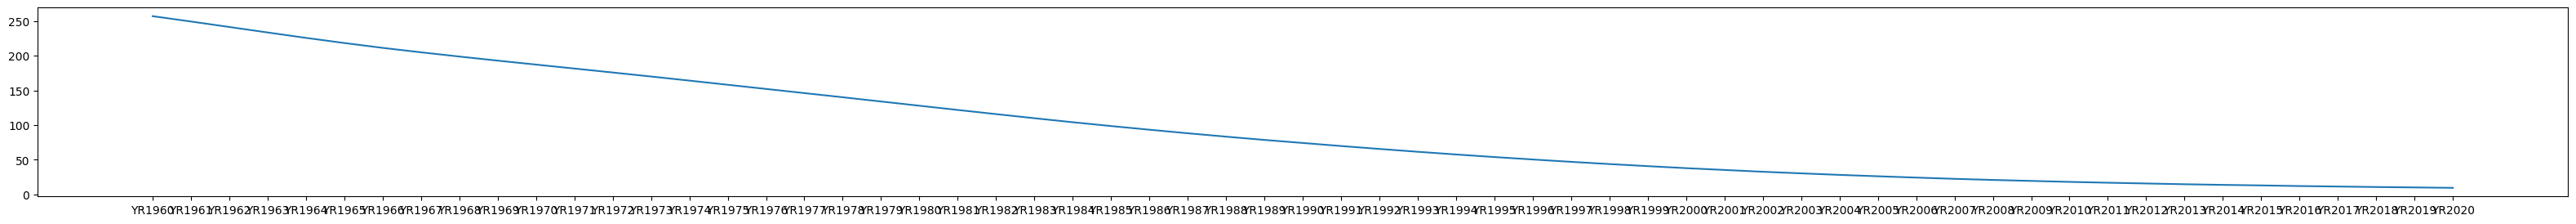

In [110]:
plotGraph(mortality)

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values(by='time', inplace=True)
/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


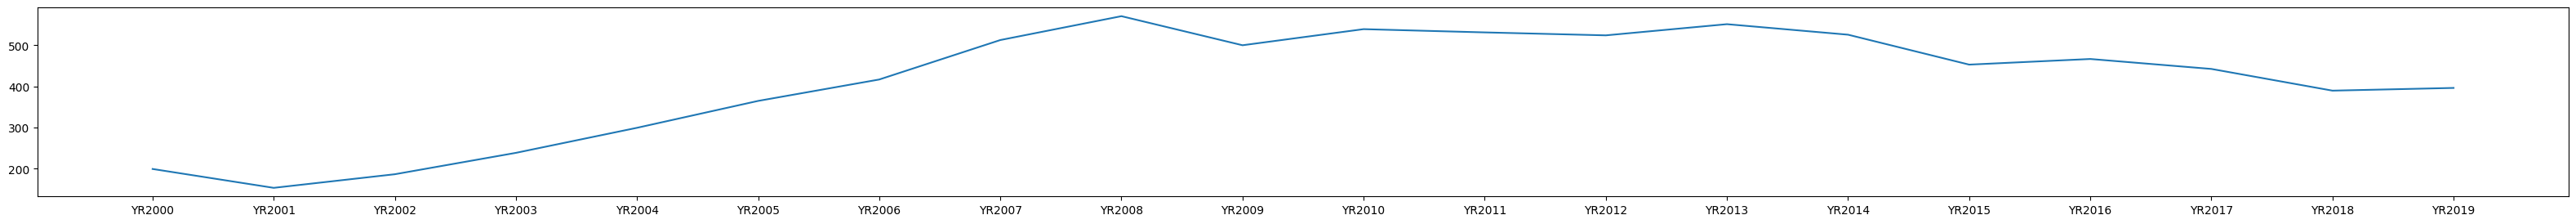

In [111]:
plotGraph(expenditure)

/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values(by='time', inplace=True)
/var/folders/vk/4r33z9590xv5j5m8dnf47bpr0000gn/T/ipykernel_12833/1812021511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


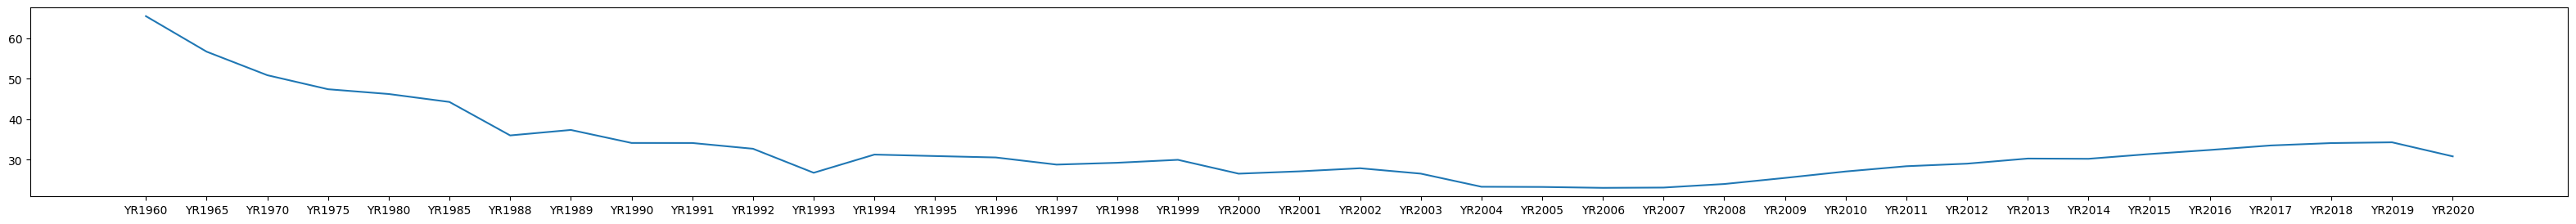

In [112]:
plotGraph(labor)

Question 3.4

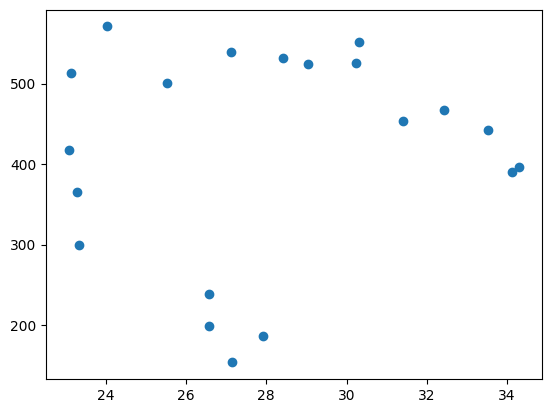

In [13]:
def plotScatter(id1,id2) :
    
    tmp = id1['value']
    tmp1 = id2['value']
    return plt.scatter(tmp,tmp1)

plotScatter(labor,expenditure)


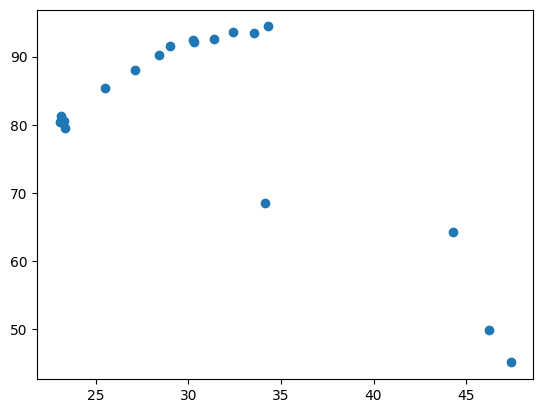

In [14]:
plotScatter(labor,literacy)

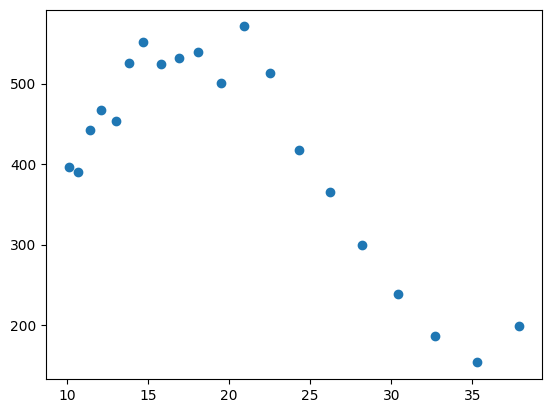

In [20]:
plotScatter(mortality,expenditure)

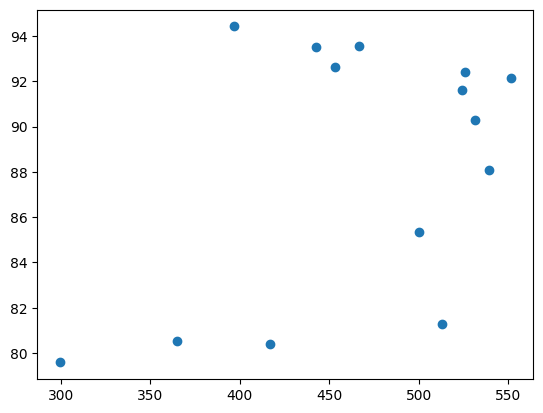

In [16]:
plotScatter(expenditure,literacy)

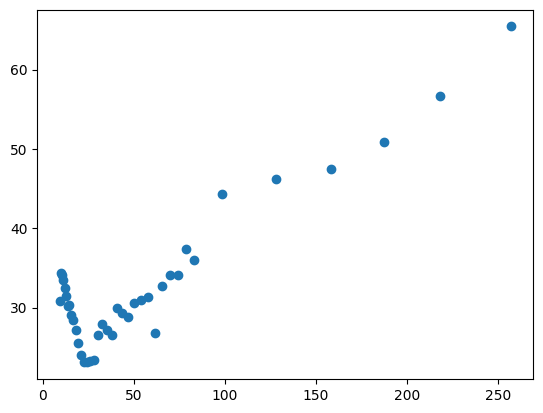

In [17]:
plotScatter(mortality,labor)

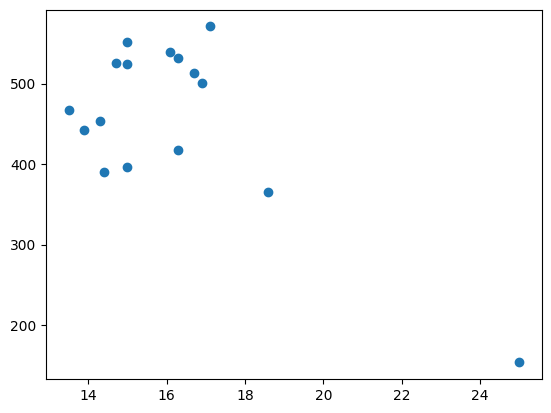

In [21]:
plotScatter(poverty,expenditure)

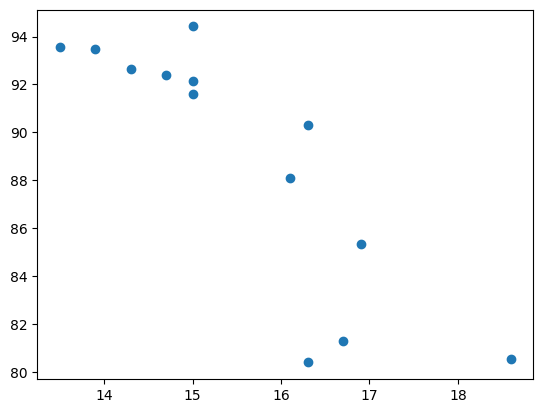

In [22]:
plotScatter(poverty,literacy)

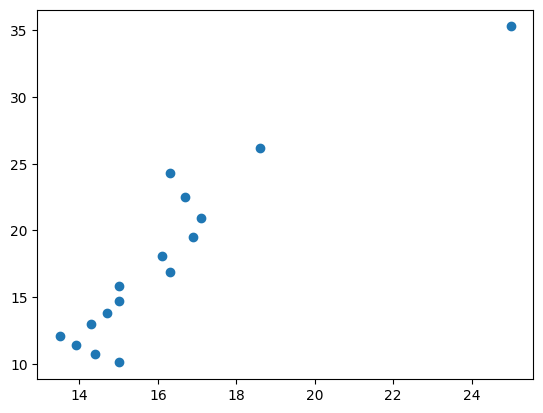

In [23]:
plotScatter(poverty,mortality)

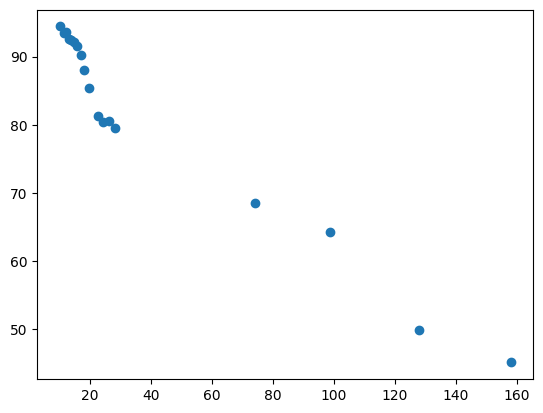

In [24]:
plotScatter(mortality,literacy)

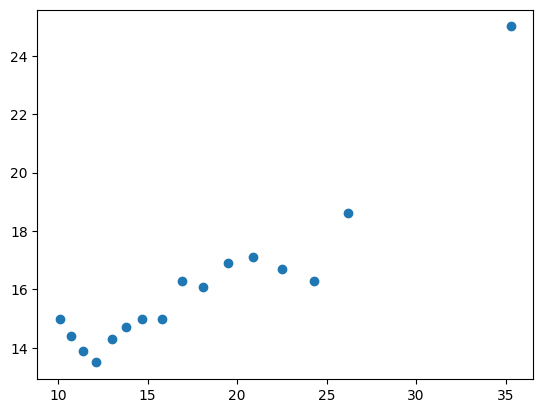

In [25]:
plotScatter(mortality,poverty)